## Plots

In [28]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

def plot(p_data, p_yId, p_xId, p_hueId, p_styleId, p_logScale=False, p_marker_label=False, p_marker_value=0, p_export_filename=None, p_xLabel=None, p_yLabel=None):
    rcParams['figure.figsize'] = 12,8
    rcParams['font.size'] = 12
    rcParams['svg.fonttype'] = 'none'
    plot = sns.lineplot(x=p_xId,
                        y=p_yId,
                        hue=p_hueId,
                        style=p_styleId,
                        data=p_data)
    if p_logScale == True:
        plot.set_yscale('log')
        plot.set_xscale('log')
    
    
    if p_xLabel != None:
        plot.set(xlabel=p_xLabel)
    else:
        plot.set(xlabel=p_xId)

    if p_yLabel != None:
        plot.set(ylabel=p_yLabel)
    else:
        plot.set(ylabel=p_yId)


    plt.grid(color='gainsboro')
    plt.grid(True,which='minor', linestyle='--', linewidth=0.5, color='gainsboro') 

    if(p_marker_label != False):
        plt.axhline(p_marker_value, linestyle='--', color='red', label=p_marker_label)

    plt.legend()

    if(p_export_filename != None):
        plt.savefig(p_export_filename)

    plt.show()

### Gauss3

#### Efficiency by cells

##### functions overview

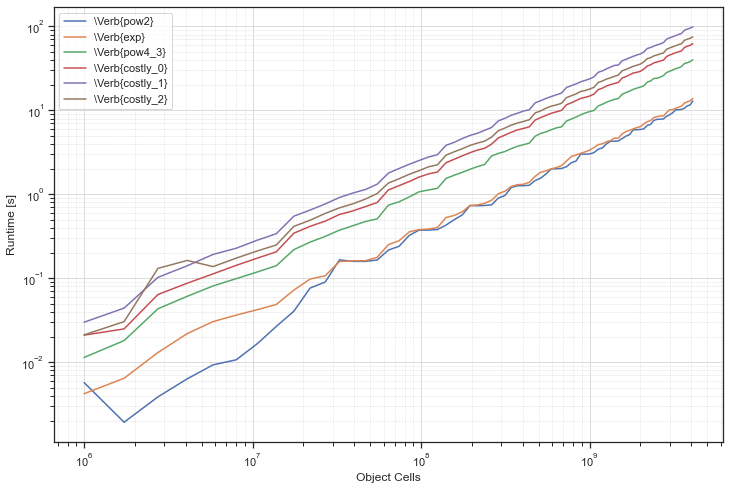

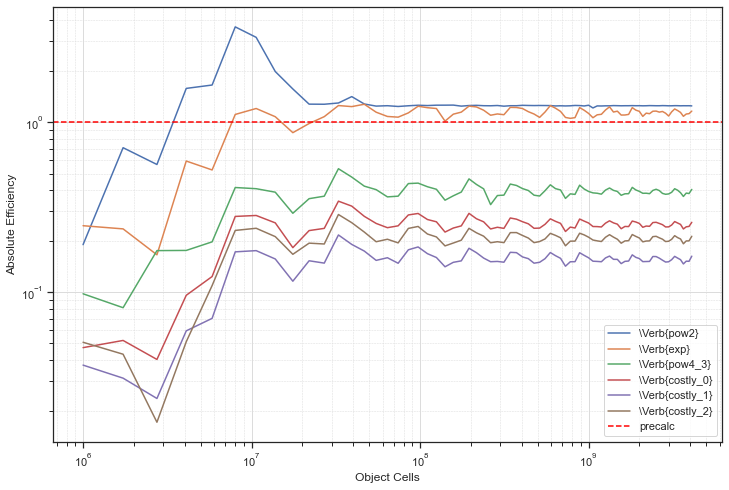

In [29]:
import pandas as pd

data_frame = pd.read_csv('./e_efficiency_by_cells.csv')
data_frame = data_frame[data_frame.region_id == 'apply']
data_frame = data_frame[data_frame.func_id != '\Verb{precalc}']
plot(p_data=data_frame,
    p_yId='runtime',
    p_xId='obj_cells',
    p_hueId='func_id',
    p_styleId=None,
    p_logScale=True,
    p_export_filename='runtime_by_cells.svg',
    p_xLabel="Object Cells",
    p_yLabel="Runtime [s]")
plot(p_data=data_frame,
    p_yId='efficiency',
    p_xId='obj_cells',
    p_hueId='func_id',
    p_styleId=None,
    p_logScale=True,
    p_marker_label='precalc',
    p_marker_value=1,
    p_export_filename='efficiency_by_cells.svg',
    p_xLabel="Object Cells",
    p_yLabel="Absolute Efficiency")

#### Arithmetic Intensity by cost

##### Empirically Determined Parameters

based on `src_master_thesis/node_characterization/likwid-bench_gauss3.out`:

In [30]:
emp_flops_max=2459.32383
emp_mem_band=233.172

In [31]:
import pandas as pd
import seaborn as sns

sns.set_theme()
sns.set_style("ticks")

maschine_balance=emp_flops_max/emp_mem_band

ops_data = pd.read_csv('./e_measure_ops.csv')
ops_data['func_id'] = ops_data.apply(lambda row: f'nonlinear_{row["func_id"].lower()}', axis=1)


roofline_data = pd.read_csv('./e_roofline.csv')

roofline_data = roofline_data[roofline_data.region_id == 'apply']
roofline_data = roofline_data.merge(ops_data, left_on='impl_id', right_on='func_id')
roofline_data['func_id'] = 'function cost'
roofline_data['ai']=roofline_data.apply(lambda row: (row['mflop_s']/row['mbytes_s']), axis=1)

#
# NOTE: add maschine balance
#
roofline_data_copy = roofline_data.copy()
roofline_data_copy['func_id'] = 'maschine balance'
roofline_data_copy['ai'] = maschine_balance
roofline_data = roofline_data_copy.append(roofline_data)

# display(roofline_data)

plot(p_data=roofline_data,
    p_yId='ai',
    p_xId='ops',
    p_hueId='func_id',
    p_styleId=None,
    p_logScale=False)

FileNotFoundError: [Errno 2] No such file or directory: './e_measure_ops.csv'

#### Performance by cost

In [ ]:
import pandas as pd
import seaborn as sns

sns.set_theme()
sns.set_style("ticks")

ops_data = pd.read_csv('./e_measure_ops.csv')
ops_data['func_id'] = ops_data.apply(lambda row: f'nonlinear_{row["func_id"].lower()}', axis=1)

roofline_data = pd.read_csv('./e_roofline.csv')
roofline_data = roofline_data[roofline_data.region_id == 'apply']
roofline_data = roofline_data.merge(ops_data, left_on='impl_id', right_on='func_id')

display(roofline_data)

roofline_data['gflop_s']=roofline_data.apply(lambda row: (row['mflop_s']/1000), axis=1)


plot(p_data=roofline_data,
    p_yId='gflop_s',
    p_xId='ops',
    p_hueId=None,
    p_styleId=None,
    p_logScale=False)